In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('test.csv')

In [3]:
df['Perf'] = np.zeros(df.shape[0])

In [4]:
df

,Components,Language,Time[sec.],Perf
0,10,Python,0.002678,0.0
1,10,Delphi,0.000400,0.0
2,10,C++,0.000714,0.0
3,20,Python,0.003860,0.0
4,20,Delphi,0.000700,0.0
5,20,C++,0.001452,0.0
6,30,Python,0.004159,0.0
7,30,Delphi,0.002800,0.0
8,30,C++,0.001781,0.0
9,50,Python,0.004898,0.0


In [5]:
py = df[df.Language == 'Python']
de = df[df.Language == 'Delphi']
cpp = df[df.Language == 'C++']

In [6]:
py['Perf'] = py['Time[sec.]'] / py['Time[sec.]']
de['Perf'] = py['Time[sec.]'].to_numpy() / de['Time[sec.]'].to_numpy()
cpp['Perf'] = py['Time[sec.]'].to_numpy() / cpp['Time[sec.]'].to_numpy()
            

C:\Users\chuva\AppData\Local\Temp\ipykernel_17860\265084845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  py['Perf'] = py['Time[sec.]'] / py['Time[sec.]']
C:\Users\chuva\AppData\Local\Temp\ipykernel_17860\265084845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  de['Perf'] = py['Time[sec.]'].to_numpy() / de['Time[sec.]'].to_numpy()
C:\Users\chuva\AppData\Local\Temp\ipykernel_17860\265084845.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [7]:
perf = pd.concat([py.Perf, de.Perf, cpp.Perf])

In [8]:
df.Perf = perf

In [9]:
df

,Components,Language,Time[sec.],Perf
0,10,Python,0.002678,1.000000
1,10,Delphi,0.000400,6.695250
2,10,C++,0.000714,3.750840
3,20,Python,0.003860,1.000000
4,20,Delphi,0.000700,5.513857
5,20,C++,0.001452,2.658196
6,30,Python,0.004159,1.000000
7,30,Delphi,0.002800,1.485250
8,30,C++,0.001781,2.335036
9,50,Python,0.004898,1.000000


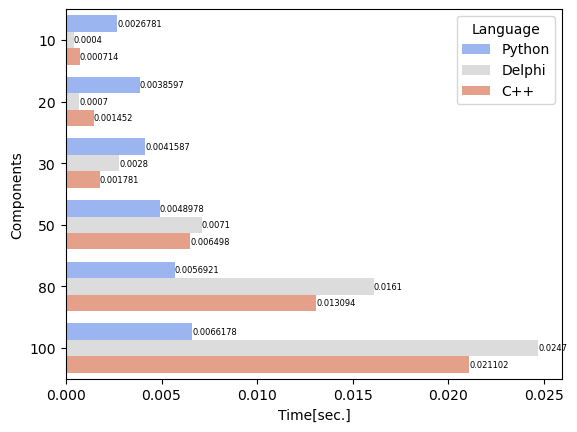

In [10]:
ax = sns.barplot(
    df, 
    y='Components', 
    x='Time[sec.]', 
    hue='Language', 
    errorbar=None,
    palette='coolwarm',
    orient='h',
)

for i in range(3):
    ax.bar_label(ax.containers[i], fontsize=6)

In [11]:
comps = df.Components.unique()

In [12]:
comps

array([ 10,  20,  30,  50,  80, 100], dtype=int64)

In [13]:
to_concat = []
for comp in comps:
    dfc = df[df.Components == comp]
    dfc = dfc.sort_values(by=['Time[sec.]'])
    dfc.Perf = dfc['Time[sec.]'].iloc[-1] / dfc['Time[sec.]']
    to_concat.append(dfc)

In [14]:
_df = pd.concat(to_concat)

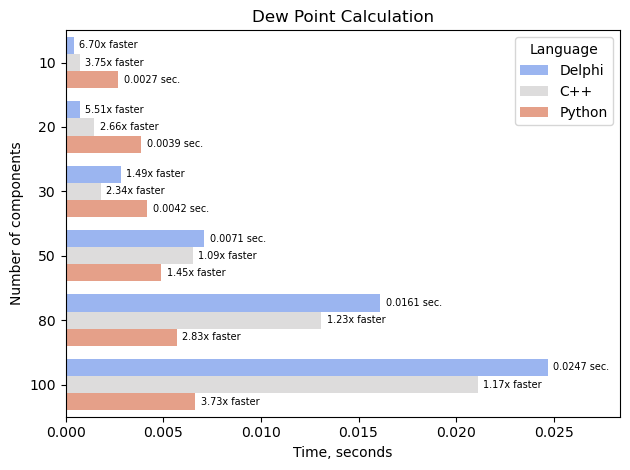

In [78]:
ax = sns.barplot(
    _df, 
    y='Components', 
    x='Time[sec.]', 
    hue='Language', 
    errorbar=None,
    palette='coolwarm',
    orient='h',
)

labels = 'Delphi', 'C++', 'Python'
for i in range(3):
    values = _df[_df.Language == labels[i]].Perf.to_numpy()
    time = _df[_df.Language == labels[i]]['Time[sec.]'].to_numpy()
    ax.bar_label(
        ax.containers[i],
        labels=[f'{v:.2f}x faster' if v != 1.0 else f'{t:.4f} sec.' for v, t in zip(values, time)],
        fontsize=7,
        padding=4
    )
ax.margins(x=0.15)
ax.set_xlabel('Time, seconds')
ax.set_ylabel('Number of components')
ax.set_title('Dew Point Calculation')
plt.tight_layout()
plt.savefig('perf_test.pdf')